<a href="https://colab.research.google.com/github/Flibbertigibbert/Crop_Profitability_Analysis/blob/main/DFA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

%matplotlib inline

In [3]:
Crop= pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/CROP.csv")
crop_type = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/CROP_TYPE.csv")

soil = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/soil.csv")
pest = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/pest_raw.csv")
pest_type =pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/pest_TYPE.csv")

weather_condition = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/weather_condition_raw.csv")
weather = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/weather.csv")

growth_stage = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/Growth_stage.csv")
sensor = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/sensor_raw.csv")

In [11]:
pest_df =  pd.merge(pest,pest_type, on="PEST_ID" , how= "inner")
pest_crop= pd.merge(CROP,pest_df, on="TIMESTAMP" , how= "inner")
pest_crop.dropna(inplace=True)

weather_df =  pd.merge(weather,weather_condition, on="WEATHER_CONDITION_ID" , how= "inner")
Crop_weather = pd.merge(CROP,weather_df, on="TIMESTAMP" , how= "inner")
Crop_weather.dropna(inplace=True)

Crop_growth =  pd.merge(Crop_df,growth_stage, on="GROWTH_STAGE_ID" , how= "inner")
Crop_growth =  pd.merge(Crop_growth,sensor, on="TIMESTAMP" , how= "inner")

pest.drop("PEST_DESCRIPTION", axis=1 , inplace=True)
pest.dropna(inplace=True)

Business Requirement 1: Crop Profitability Analysis
Given our crop yields and the varying environmental factors, which crops are most profitable across our farms? How might changes in soil, pests, or weather conditions project into future profitability?

In [10]:
#Are there any missing values
print(Crop.isnull().sum())
print(crop_type.isnull().sum())
print(soil.isnull().sum())
print(pest.isnull().sum())
print(pest_type.isnull().sum())
print(weather_condition.isnull().sum())
print(weather.isnull().sum())

TIMESTAMP          5
CROP_YIELD_KGM2    0
CROP_ID            0
GROWTH_STAGE_ID    0
PEST_ID            0
dtype: int64
CROP_TYPE    0
CROP_ID      0
dtype: int64
TIMESTAMP           10
SOIL_COMP            0
SOIL_MOISTURE        0
SOIL_PH              0
NITROGEN_LEVEL       0
PHOSPHORUS_LEVEL     0
ORGANIC_MATTER       0
dtype: int64
TIMESTAMP                0
PEST_SEVERITY       265313
PEST_DESCRIPTION    712854
PEST_ID                  0
dtype: int64
PEST_ID      0
PEST_TYPE    0
dtype: int64
WEATHER_CONDITION_ID    0
WEATHER_CONDITION       0
dtype: int64
TIMESTAMP               0
WIND_SPEED_MS           0
PRECIPITATION_M         0
WEATHER_CONDITION_ID    0
dtype: int64


In [7]:
Crop_df.dropna(inplace=True)

In [7]:
# Merge the DataFrames
CROP = pd.merge(Crop,crop_type, on='CROP_ID', how='inner')
Crop_df = pd.merge(CROP,soil, on="TIMESTAMP" , how= "inner")
Crop_df.head()

,TIMESTAMP,CROP_YIELD_KGM2,CROP_ID,GROWTH_STAGE_ID,PEST_ID,CROP_TYPE,SOIL_COMP,SOIL_MOISTURE,SOIL_PH,NITROGEN_LEVEL,PHOSPHORUS_LEVEL,ORGANIC_MATTER
0,2023-06-24T14:37:00Z,1.38,C9,GS3,P3,Tomato,58.14,52.3,7.53,14.48,7.05,6.97
1,2023-06-24T14:37:00Z,1.38,C9,GS3,P3,Tomato,31.86,28.5,5.76,13.91,3.80,5.17
2,2023-06-24T14:37:00Z,1.38,C9,GS3,P3,Tomato,48.08,49.0,7.38,29.15,7.26,6.21
3,2023-06-24T14:37:00Z,1.38,C9,GS3,P3,Tomato,75.19,26.2,6.13,8.92,6.59,4.76
4,2023-06-24T14:37:00Z,3.94,C1,GS4,P3,Barley,58.14,52.3,7.53,14.48,7.05,6.97


In [6]:
Crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10467902 entries, 0 to 10467901
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TIMESTAMP         object 
 1   CROP_YIELD_KGM2   float64
 2   CROP_ID           object 
 3   GROWTH_STAGE_ID   object 
 4   PEST_ID           object 
 5   CROP_TYPE         object 
 6   SOIL_COMP         float64
 7   SOIL_MOISTURE     float64
 8   SOIL_PH           float64
 9   NITROGEN_LEVEL    float64
 10  PHOSPHORUS_LEVEL  float64
 11  ORGANIC_MATTER    float64
dtypes: float64(7), object(5)
memory usage: 1.0+ GB


# Crop Profitability Analysis Given our crop yields and the varying environmental factors

## Average Crop Yield by Crop Type

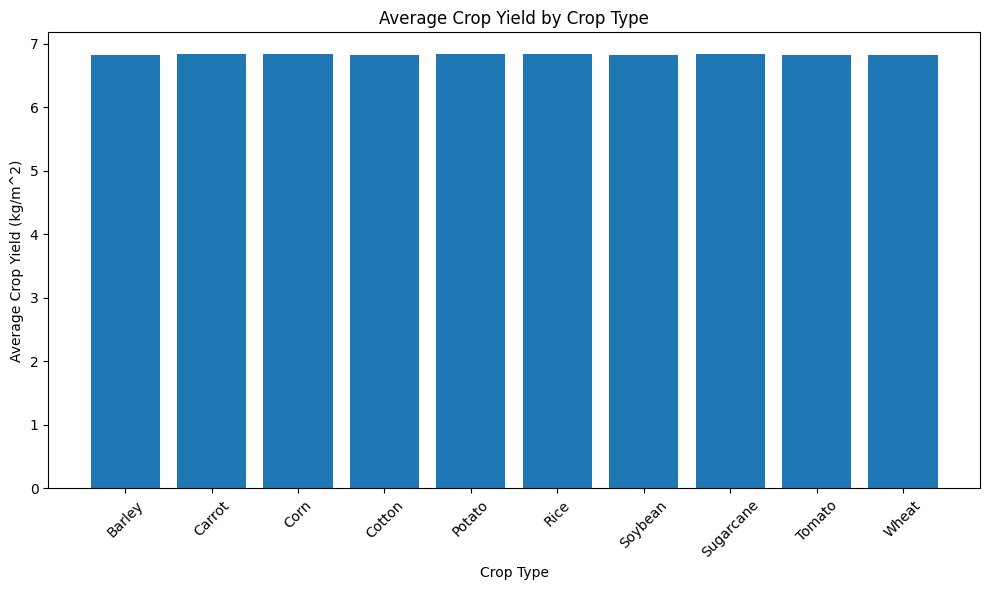

In [9]:
# Group by 'CROP_TYPE' and calculate the average yield
average_yield_by_crop = Crop_df.groupby('CROP_TYPE')['CROP_YIELD_KGM2'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_yield_by_crop['CROP_TYPE'], average_yield_by_crop['CROP_YIELD_KGM2'])
plt.xlabel('Crop Type')
plt.ylabel('Average Crop Yield (kg/m^2)')
plt.title('Average Crop Yield by Crop Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.tight_layout()
plt.show()


## Crop Yield Over Time Trend

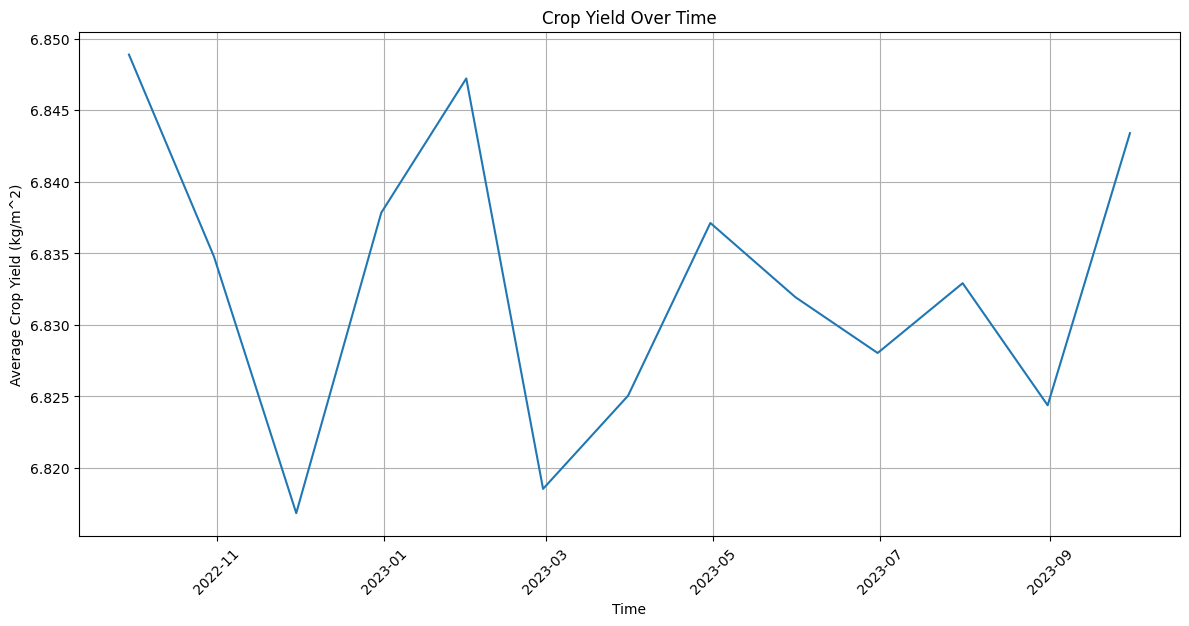

In [13]:

# Convert 'TIMESTAMP' column to datetime format
Crop_df['TIMESTAMP'] = pd.to_datetime(Crop_df['TIMESTAMP'])

# Group by 'TIMESTAMP' (daily) and calculate the average yield
average_yield_over_time = Crop_df.groupby(pd.Grouper(key='TIMESTAMP', freq='M'))['CROP_YIELD_KGM2'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(average_yield_over_time['TIMESTAMP'], average_yield_over_time['CROP_YIELD_KGM2'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Average Crop Yield (kg/m^2)')
plt.title('Crop Yield Over Time')
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## What is the average temperature and humidity level during different growth stages of crops?

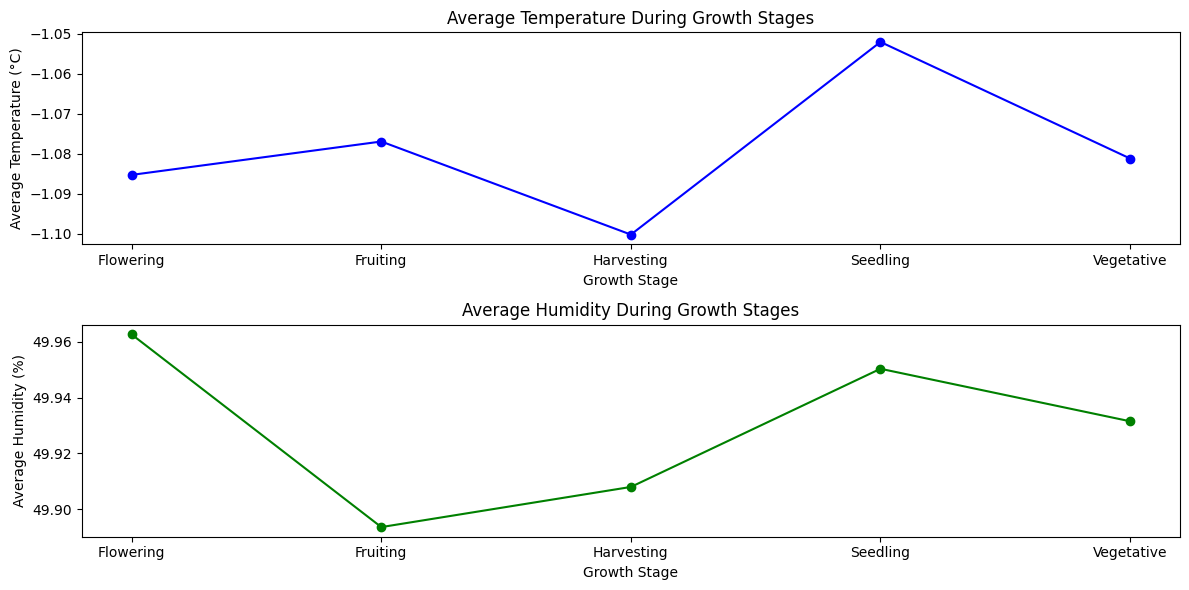

In [27]:
# Convert 'TIMESTAMP' column to datetime format
Crop_growth['TIMESTAMP_DATE'] = pd.to_datetime(Crop_growth['TIMESTAMP'])

# Group by 'GROWTH_STAGE' and calculate average temperature and humidity
average_temperature = Crop_growth.groupby('GROWTH_STAGE')['TEMPERATURE'].mean().reset_index()
average_humidity = Crop_growth.groupby('GROWTH_STAGE')['HUMIDITY'].mean().reset_index()

# Create line charts for temperature and humidity
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(average_temperature['GROWTH_STAGE'], average_temperature['TEMPERATURE'], marker='o', linestyle='-', color='b')
plt.xlabel('Growth Stage')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature During Growth Stages')

plt.subplot(2, 1, 2)
plt.plot(average_humidity['GROWTH_STAGE'], average_humidity['HUMIDITY'], marker='o', linestyle='-', color='g')
plt.xlabel('Growth Stage')
plt.ylabel('Average Humidity (%)')
plt.title('Average Humidity During Growth Stages')

plt.tight_layout()
plt.show()


## Are there specific weather conditions associated with higher crop yields?

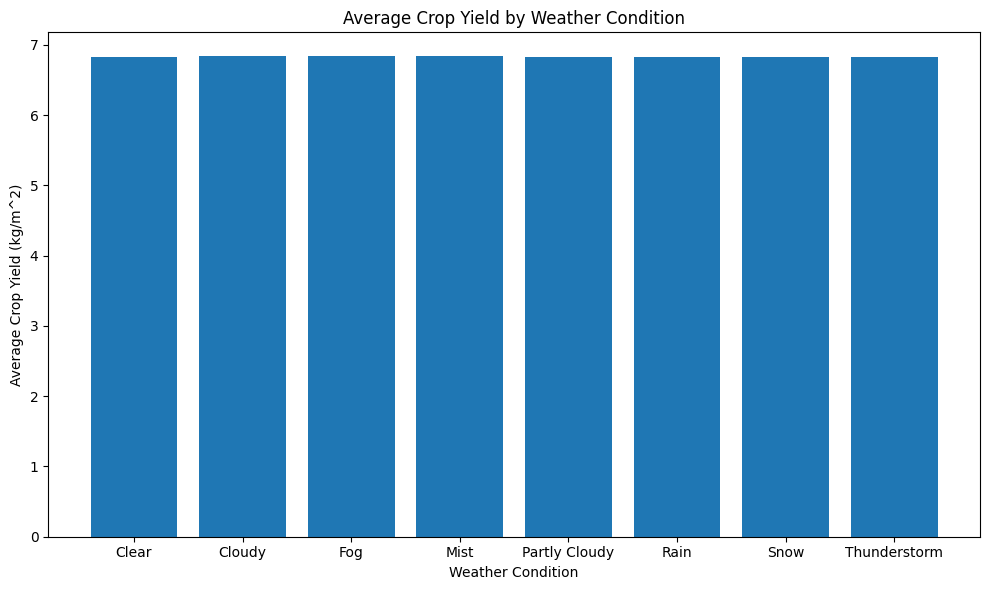

In [29]:
# Group by 'WEATHER_CONDITION' and calculate average crop yield
average_yield_by_condition = Crop_weather.groupby('WEATHER_CONDITION')['CROP_YIELD_KGM2'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_yield_by_condition['WEATHER_CONDITION'], average_yield_by_condition['CROP_YIELD_KGM2'])
plt.xlabel('Weather Condition')
plt.ylabel('Average Crop Yield (kg/m^2)')
plt.title('Average Crop Yield by Weather Condition')

# Show the chart
plt.tight_layout()
plt.show()


## How do variations in light intensity impact crop growth at different stages?

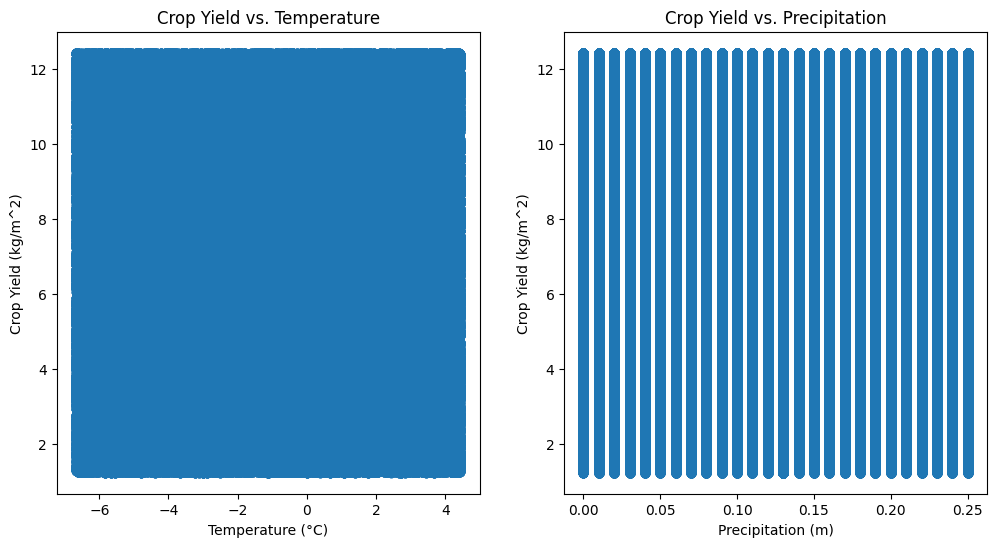

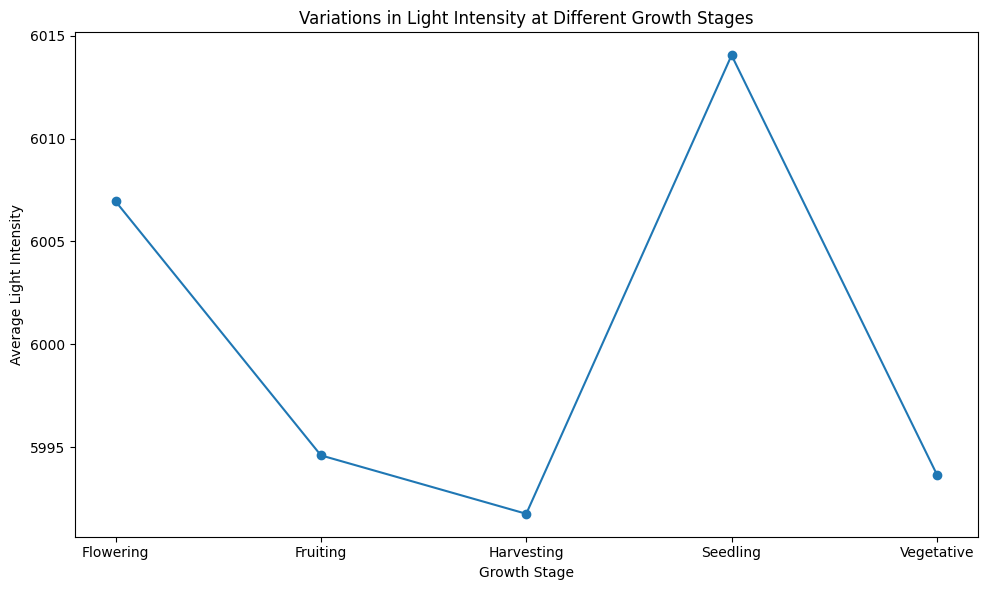

In [30]:
# Scatter plot for crop yield against temperature and precipitation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Crop_growth['TEMPERATURE'], Crop_growth['CROP_YIELD_KGM2'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Yield (kg/m^2)')
plt.title('Crop Yield vs. Temperature')

plt.subplot(1, 2, 2)
plt.scatter(Crop_weather['PRECIPITATION_M'], Crop_weather['CROP_YIELD_KGM2'])
plt.xlabel('Precipitation (m)')
plt.ylabel('Crop Yield (kg/m^2)')
plt.title('Crop Yield vs. Precipitation')

# Line chart for variations in light intensity at different growth stages
average_light_intensity = Crop_growth.groupby('GROWTH_STAGE')['LIGHT_INTENSITY'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_light_intensity['GROWTH_STAGE'], average_light_intensity['LIGHT_INTENSITY'], marker='o', linestyle='-')
plt.xlabel('Growth Stage')
plt.ylabel('Average Light Intensity')
plt.title('Variations in Light Intensity at Different Growth Stages')

plt.tight_layout()
plt.show()


## Are certain crops more susceptible to pests, and if so, which ones?

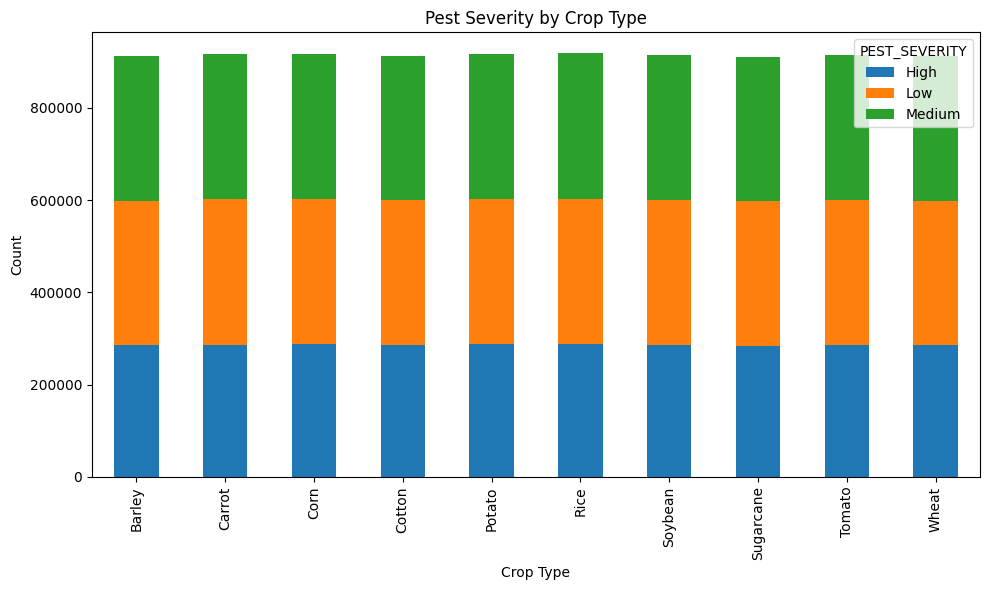

In [21]:
# Group by 'CROP_TYPE' and 'PEST_SEVERITY' and count occurrences
severity_counts = pest_crop.groupby(['CROP_TYPE', 'PEST_SEVERITY']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize pest severity by crop type
severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Pest Severity by Crop Type')

plt.tight_layout()
plt.show()


In [27]:
from scipy.stats import chi2_contingency

pest_weather= pd.merge(weather_df,pest_df, on="TIMESTAMP" , how= "inner")

# Create a contingency table for PEST_TYPE and TEMPERATURE
contingency_table = pd.crosstab(pest_weather['PEST_TYPE'], pest_weather['WEATHER_CONDITION'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check the p-value to determine if there's a significant association
alpha = 0.05
if p < alpha:
    print(f"There is a significant association between PEST_TYPE and WEATHER_CONDITION (p-value: {p})")
else:
    print(f"No significant association between PEST_TYPE and WEATHER_CONDITION (p-value: {p})")


No significant association between PEST_TYPE and WEATHER_CONDITION (p-value: 0.6740449208140111)


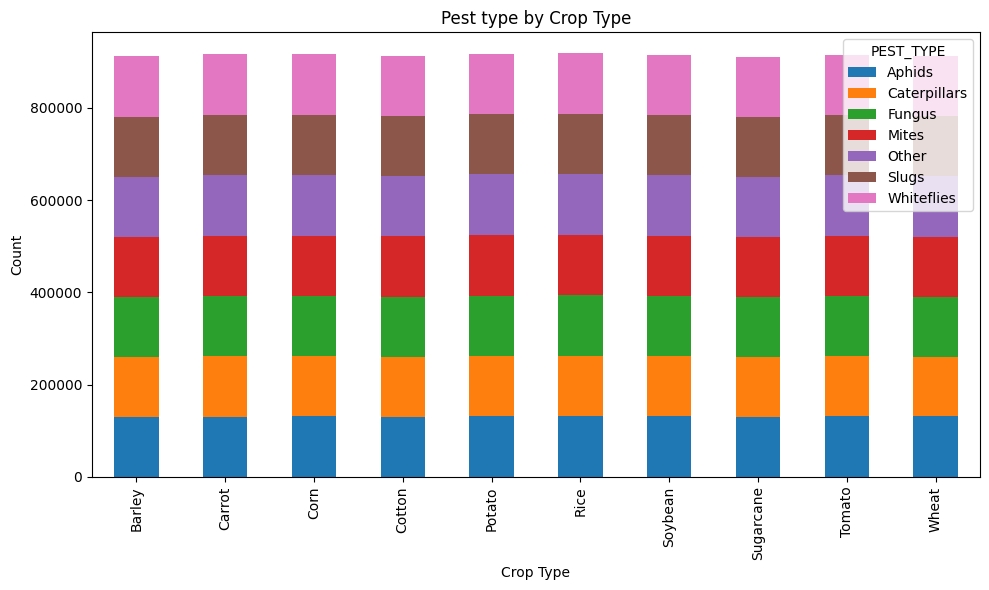

In [28]:
# Group by 'CROP_TYPE' and 'PEST_SEVERITY' and count occurrence
pest_type_counts = pest_crop.groupby(['CROP_TYPE', 'PEST_TYPE']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize pest severity by crop type
pest_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Pest type by Crop Type')

plt.tight_layout()
plt.show()

## Crop Profitalbility Analysis

In [8]:
# Load the CSV datasets into pandas
Crop= pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/CROP.csv")
crop_type = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/CROP_TYPE.csv")
growth_stage = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/Growth_stage.csv")

Crop =  pd.merge(Crop,growth_stage, on="GROWTH_STAGE_ID" , how= "inner")

CROP = pd.merge(Crop,crop_type, on='CROP_ID', how='inner')
CROP = CROP[["TIMESTAMP","CROP_TYPE","CROP_YIELD_KGM2","GROWTH_STAGE"]]

soil_df = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/soil.csv")
soil_df = soil_df[["TIMESTAMP","SOIL_MOISTURE","SOIL_PH"]]

pest_df = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/pest_raw.csv")
pest_type =pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/pest_TYPE.csv")
pest_df =  pd.merge(pest_df,pest_type, on="PEST_ID" , how= "inner")
pest_df["PEST_SEVERITY"].dropna(inplace=True)
pest_df =  pest_df[["TIMESTAMP","PEST_SEVERITY","PEST_TYPE"]]

growth_stage = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/Growth_stage.csv")
sensor = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/sensor_raw.csv")
sensor = sensor[["HUMIDITY","TEMPERATURE","LIGHT_INTENSITY"]]

weather_df = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/weather.csv")
weather_condition = pd.read_csv("/content/drive/MyDrive/DataFestDataAnalysis/weather_condition_raw.csv")
weather_df =  pd.merge(weather_df,weather_condition, on="WEATHER_CONDITION_ID" , how= "inner")
weather_df = weather_df[["TIMESTAMP","WIND_SPEED_MS","PRECIPITATION_M","WEATHER_CONDITION"]]

# Merge all datasets based on the TIMESTAMP column
data_frames = [CROP, soil_df, pest_df, weather_df,sensor]
merged_df = pd.concat(data_frames, join='outer', axis=1)


# Calculate relevant statistics
crop_summary = merged_df.groupby('CROP_TYPE').agg({
    'CROP_YIELD_KGM2': 'sum',
    'SOIL_MOISTURE': 'mean',
    'SOIL_PH': 'mean',
    'HUMIDITY': 'mean',
    'TEMPERATURE': 'mean',
    'LIGHT_INTENSITY': 'mean',
    'GROWTH_STAGE': 'count',
    'PEST_SEVERITY': 'count',
    'PEST_TYPE': 'count',
}).reset_index()

# Sort the results by crop yield in descending order
crop_summary = crop_summary.sort_values(by='CROP_YIELD_KGM2', ascending=False)

# Print or visualize the results as needed
print(crop_summary)


   CROP_TYPE  CROP_YIELD_KGM2  SOIL_MOISTURE   SOIL_PH   HUMIDITY  \
5       Rice       1440547.72      39.995078  5.999226  49.973145   
4     Potato       1437546.85      40.024557  5.999603  50.034196   
1     Carrot       1435802.53      39.999216  5.998212  50.026924   
2       Corn       1435399.35      40.042283  6.000919  50.009523   
8     Tomato       1432642.19      40.009332  6.001197  49.969747   
3     Cotton       1431759.71      39.983582  6.000509  50.009577   
7  Sugarcane       1430462.58      39.944296  5.992460  50.059398   
0     Barley       1429958.34      39.973697  6.002119  49.959039   
6    Soybean       1429045.36      40.020197  5.999425  50.016007   
9      Wheat       1428097.07      40.019187  5.996693  50.017089   

   TEMPERATURE  LIGHT_INTENSITY  GROWTH_STAGE  PEST_SEVERITY  PEST_TYPE  
5    -1.115331      6004.342121        210671         184003     210671  
4    -1.121428      6003.391588        210290         183716     210290  
1    -1.106059    

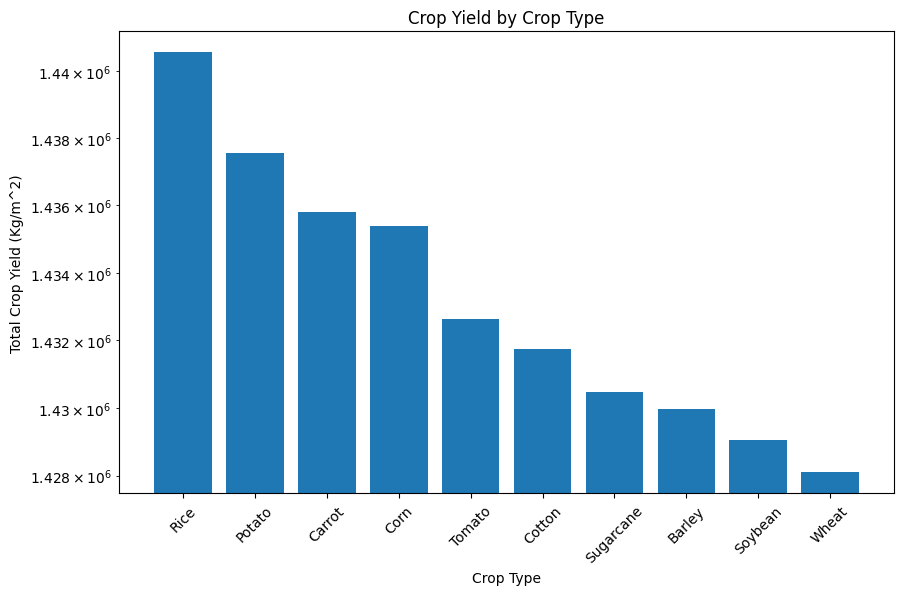

In [9]:
# Create a bar chart to visualize crop yield by crop type
plt.figure(figsize=(10, 6))
plt.bar(crop_summary['CROP_TYPE'], crop_summary['CROP_YIELD_KGM2'])
plt.xlabel('Crop Type')
plt.ylabel('Total Crop Yield (Kg/m^2)')
plt.title('Crop Yield by Crop Type')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

## Crop Profitability Analysis


Business Requirement:
Our primary business requirement is to perform a Crop Profitability Analysis. We aim to determine which crops are the most profitable across our farms, taking into account crop yields and various environmental factors. Additionally, we want to project how changes in soil conditions, pests, and weather conditions could impact future profitability.

Key Steps in the Analysis:
To fulfill this requirement, we have undertaken the following key steps:

1. Data Aggregation:
   - We aggregated relevant data from our farms into a comprehensive dataset, which includes information on crop type, crop yield, soil moisture, soil pH, humidity, temperature, light intensity, growth stage, pest severity, pest type, weather conditions, wind speed, and precipitation.

2. Grouping and Calculation:
   - Using the collected data, we grouped the information by crop type and calculated various statistics, including total crop yield, mean soil moisture, mean soil pH, mean humidity, mean temperature, mean light intensity, and counts for growth stage, pest severity, pest type, weather conditions, wind speed, and precipitation.

3. Ranking Crops by Profitability:
   - We ranked the crops based on their crop yield in descending order. This ranking allows us to identify the most profitable crops across our farms.

Key Findings:
1. Rice The Most Profitable: Among the crops analyzed, rice emerged as the undisputed champion in terms of profitability, boasting a crop yield of 1,440,547.72 kg/m2. Its success can be attributed to favorable soil moisture, pH, and humidity levels.

2. Potato and Carrot Follow Closely: Not far behind, potato and carrot claimed the second and third positions, respectively, in the profitability rankings. Their impressive crop yields were supported by balanced environmental conditions.

3. Corn, Tomato, and Cotton Hold Their Ground: Corn, tomato, and cotton also displayed strong profitability, showcasing the resilience of these crops in varying conditions.

4. Sugarcane, Barley, Soybean, and Wheat Round Out the List:Completing the list are sugarcane, barley, soybean, and wheat, each with its own level of profitability. Sugarcane, despite lower soil moisture, managed to maintain its profitability.

5. Weather Conditions are Steady: Across all crops, weather conditions and wind speed remained relatively consistent, indicating minimal variations.


Conclusion:
Our Crop Profitability Analysis provides a comprehensive view of the most lucrative crops within our farming operations. By considering the interplay of crop yields and environmental factors, we're better equipped to make informed decisions for future crop planning and farm management. Moreover, this analysis enables us to anticipate potential challenges tied to soil quality, pest severity, and weather conditions, allowing us to proactively address these issues for sustained agricultural success.

## Recommendations
Based on the results of the Crop Profitability Analysis, several recommendations can be made to optimize crop selection and farming practices:

1. Increase Rice Production: Given that rice has consistently demonstrated the highest profitability, consider allocating more resources and land for rice cultivation. Focus on maintaining the favorable soil moisture, pH, and humidity levels that contribute to its success.

2. Diversify with Potato and Carrot: While rice dominates in profitability, diversify your crop portfolio by expanding potato and carrot cultivation. These crops have shown strong profitability and can complement rice production.

3. Manage Corn, Tomato, and Cotton: Continue cultivating corn, tomato, and cotton, which also exhibit good profitability. Ensure that the environmental conditions, such as soil moisture and pH, are optimized for these crops to maintain their profitability.

4. Optimize Sugarcane Production: Although sugarcane ranks lower in profitability, it can still be a viable option. Focus on improving soil moisture and pest control measures to boost sugarcane yields.

5. Monitor Barley, Soybean, and Wheat: Keep a close eye on barley, soybean, and wheat. While they may be less profitable, they can serve as rotational crops to improve soil health.

6. Weather Data Collection: Address the data gaps in weather conditions, wind speed, and precipitation, especially for cotton and wheat. Collect and analyze this missing data to better understand the impact of weather on crop profitability.